## GRIP - The Spark Foundation

### Task 3 - Prediction Using Unsupervised Learning

#### predicting the optimum number of clusters and represent it visually

In [8]:
import pandas as pd
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [9]:
iris = datasets.load_iris()
df = pd.DataFrame(iris.data,columns=iris.feature_names)

In [10]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [11]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### Data Visualization

/home/rahul/.local/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:298: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/home/rahul/.local/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:298: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/home/rahul/.local/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:304: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
/home/rahul/.local/lib/python3.7/site-packages/pandas

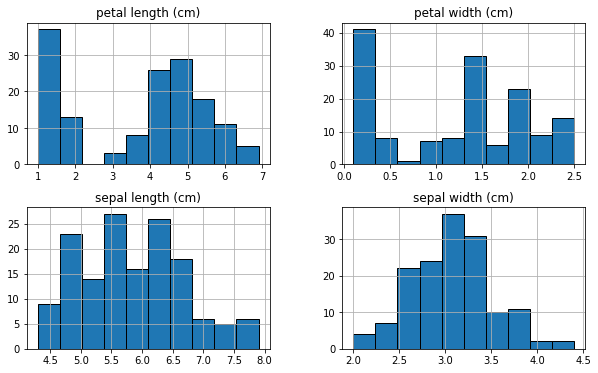

In [12]:
df.hist(edgecolor='black',figsize=(10,6))
plt.show()

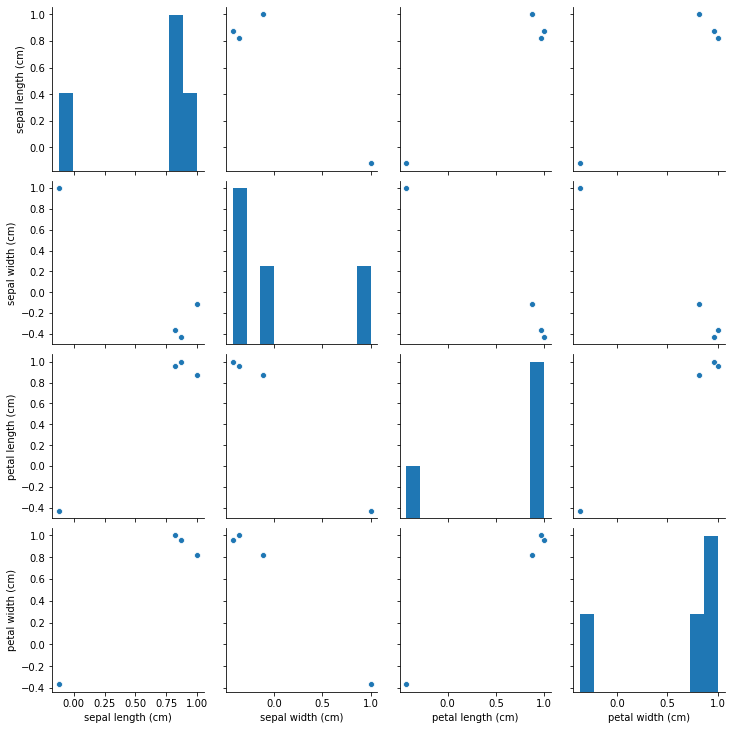

In [7]:
sns.pairplot(df.corr())

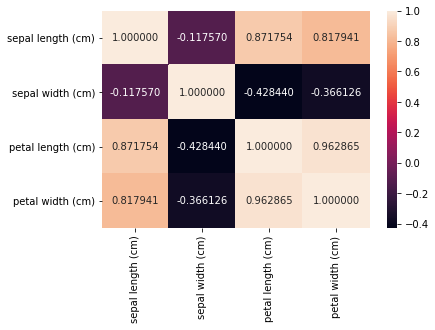

In [13]:
sns.heatmap(df.corr(),annot=True,fmt='f')
plt.show()

## Modeling

In [14]:
x = df.iloc[:,[0,1,2,3]].values

#### Predicting the optimum number of clusters using Elbow Method

In [15]:
from sklearn.cluster import KMeans

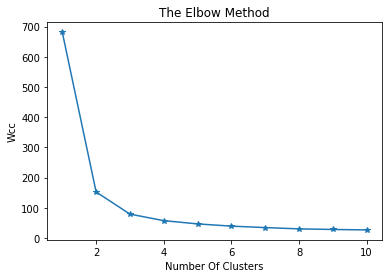

In [18]:
wcc = []
for i in range(1,11):
    km = KMeans(n_clusters=i,init='k-means++',max_iter=500,n_init=10,random_state=0)
    km.fit(x)
    wcc.append(km.inertia_)
plt.plot(range(1,11),wcc,marker='*')
plt.title('The Elbow Method')
plt.xlabel('Number Of Clusters')
plt.ylabel('Wcc')
plt.show()

In [19]:
km = KMeans(n_clusters=3,n_init=10,max_iter=500,init='k-means++',random_state=1)
y=km.fit_predict(x)

### Visualizing The Clusters in 3D

In [20]:
from mpl_toolkits.mplot3d import Axes3D

AttributeError: 'Text' object has no property 'figsize'

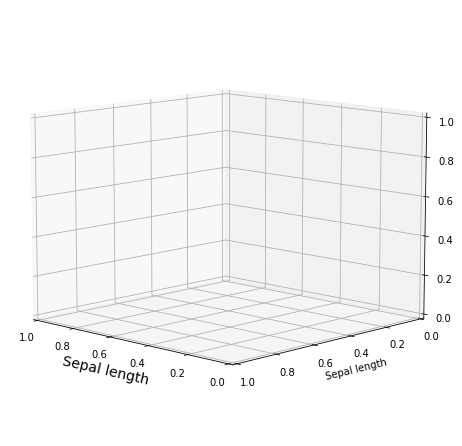

In [23]:
fig = plt.figure(1,figsize=(8,6))
plt.clf()
ax = Axes3D(fig,rect=[0,0,.95,1],elev=10,azim=134)
plt.cla()

ax.set_xlabel('Sepal length',fontsize=14)
ax.set_ylabel('Sepal length',figsize=14)
ax,set_zlabel('Sepal length',figsize=14)


sc = ax.scatter(x[:,0],x[:,1],x[:,2],c=y.astype(np.float),s=50,cmap='brg')

t=ax.legend(*sc.legend_elements())
t.get_texts()[0].set_text('Iris-setosa')
t.get_texts()[1].set_text('Iris-versicolour')
t.get_texts()[2].set_text('Iris-virginica')